# "Feature Detection using Image Filtering" #

Image Processing 

Objective: Apply a convolutional kernel to an image to detect features such as edges, enhancing the visibility of various features within the image.

1. Import Libraries

cv2 (OpenCV): Used for loading and processing the image.
pandas: Used to convert image data into a DataFrame format for potential analysis or export.
numpy: Supports handling large arrays, used here for matrix operations on the image data.
scipy.signal.convolve2d: Applies a convolutional kernel to the image.
matplotlib.pyplot: Used for displaying images within the Jupyter notebook.
2. Load the Image

The image is loaded from a specified file path into a data format that can be manipulated (numpy array) using OpenCV.

3. Convert Image Color Format

The image is converted from BGR (default color format in OpenCV) to RGB. This step is crucial for accurate color representation in subsequent visualization and processing.

4. Kernel Definition
A kernel, also known as a convolution matrix or mask, is a small matrix used to apply effects such as blurring, sharpening, embossing, edge detection, etc. In this script:

Define the Convolutional Kernel
A 5x5 kernel is defined to detect features. The kernel has higher weights in the center and negative weights around the edges. This setup highlights areas of rapid intensity change, which are typically the edges in an image.
The kernel is normalized (divided by the sum of its elements) to maintain the overall brightness of the image.

5. Convolution Operation
Using scipy.signal.convolve2d, the kernel is convolved across each color channel (Red, Green, Blue) of the image. This operation applies the kernel to every possible position of the kernel over the image, which results in each pixel's value being recalculated as a weighted sum of its neighbors.
mode='same' ensures the output image has the same size as the input.
boundary='fill' and fillvalue=0 handle the edges by padding zeros outside the image boundaries.

6. Stacking and Type Conversion
After filtering each channel independently, they are stacked back into a single image using np.stack(channels, axis=-1). The resulting array is then converted to an unsigned 8-bit integer format. This conversion is necessary because pixel values are expected to be in the range 0-255.

7. Displaying Images
Using matplotlib.pyplot, the original and the filtered images are displayed side by side. This visualization helps in comparing the original image with the effect of the convolution.

8. Saving the Filtered Image Data
Finally, the pixel data from the filtered image is reshaped and converted into a pandas DataFrame. This DataFrame is then saved as a CSV file.

In [1]:
import cv2
import pandas as pd
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/rameshchidurala/Documents/DSC-550 Activities/pexels-pixabay-60597.jpg'  # image path
image = cv2.imread(image_path)

# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image)

# Define a 5x5 kernel for feature detection (edge detection)
kernel = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 2, 2, 2, -1],
    [-1, 2, 8, 2, -1],
    [-1, 2, 2, 2, -1],
    [-1, -1, -1, -1, -1]
]) / 8.0  # Normalizing the kernel

# Applying the kernel to the image using convolve2d from scipy
# We apply it to each channel separately
channels = [convolve2d(image_rgb[:,:,i], kernel, mode='same', boundary='fill', fillvalue=0) for i in range(3)]


[[[37 51 23]
  [37 51 23]
  [37 51 23]
  ...
  [37 51 23]
  [37 51 23]
  [37 51 23]]

 [[37 51 23]
  [37 51 23]
  [37 51 23]
  ...
  [37 51 23]
  [37 51 23]
  [37 51 23]]

 [[37 51 23]
  [37 51 23]
  [37 51 23]
  ...
  [37 51 23]
  [37 51 23]
  [37 51 23]]

 ...

 [[37 51 23]
  [37 51 23]
  [37 51 23]
  ...
  [37 51 23]
  [37 51 23]
  [37 51 23]]

 [[37 51 23]
  [37 51 23]
  [37 51 23]
  ...
  [37 51 23]
  [37 51 23]
  [37 51 23]]

 [[37 51 23]
  [37 51 23]
  [37 51 23]
  ...
  [37 51 23]
  [37 51 23]
  [37 51 23]]]


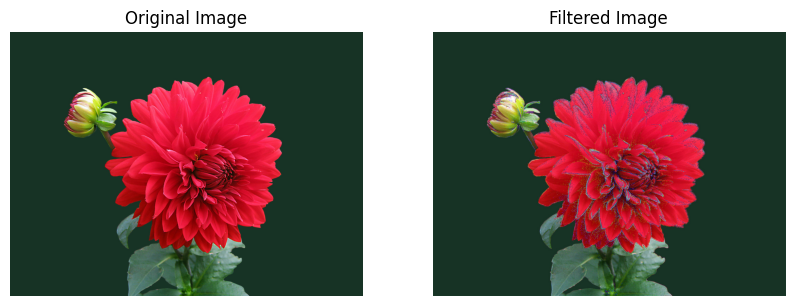

In [7]:
# Stack the channels back into an image
filtered_image = np.stack(channels, axis=-1).astype(np.uint8)

# Display original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.axis('off')

plt.show()

# Save the filtered image matrix to a DataFrame and then to CSV
df = pd.DataFrame(filtered_image.reshape(-1, 3), columns=['R', 'G', 'B'])
df.to_csv('Flower-from-cv Image.csv', index=False)